## 선진포크 탐색적 데이터 분석

- 선진포크에서 제공한 xlsx 파일을 읽고 데이터프레임을 생성합니다.
- 살구색 정보(그룹~육질등급)로 파란색 정보(지방비율과 제품등급)을 추정하는 것을 목표로 합니다.
- 데이터프레임에서 녹색 정보(육색~목심탄력)를 삭제합니다.

### 데이터셋 준비

In [1]:
# 관련 라이브러리를 호출합니다.
import os
import chardet
import joblib
import numpy as np
import pandas as pd

In [2]:
# 현재 작업 경로를 확인합니다.
os.getcwd()

'C:\\Users\\drkev\\Documents\\Sunjin\\code'

In [3]:
# data 폴더로 작업 경로를 변경합니다.
os.chdir(path = '../data')

In [4]:
# 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다.
os.listdir()

['00_raw_digital_mba_공유.csv', '00_raw_digital_mba_공유.xlsx', 'iris.csv']

In [5]:
# xlsx 파일을 읽고 데이터프레임을 생성합니다.
%time df = pd.read_excel(io = '00_raw_digital_mba_공유.xlsx', skiprows = 8)

CPU times: total: 17.5 s
Wall time: 17.5 s


In [6]:
# csv 파일명을 변수에 할당합니다.
fileName = '00_raw_digital_mba_공유.csv'

In [7]:
# csv 파일로 저장합니다.
df.to_csv(path_or_buf = fileName, index = None)

In [8]:
# csv 파일을 바이너리로 읽고 인코딩 방식을 확인합니다.
raw = open(file = fileName, mode = 'rb').read()
chardet.detect(byte_str = raw[:1000])

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [9]:
# csv 파일을 읽고 데이터프레임을 생성합니다.
%time
df = pd.read_csv(
    filepath_or_buffer = fileName, 
    parse_dates = ['입고일', '도축일', '검품일', '생산일']
)

CPU times: total: 0 ns
Wall time: 0 ns


In [10]:
# df의 정보를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66049 entries, 0 to 66048
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   그룹      66049 non-null  object        
 1   농장명     66049 non-null  object        
 2   공장명     66049 non-null  object        
 3   입고일     66049 non-null  datetime64[ns]
 4   도축일     66049 non-null  datetime64[ns]
 5   검품일     66049 non-null  datetime64[ns]
 6   생산일     66049 non-null  datetime64[ns]
 7   도체      66049 non-null  int64         
 8   암       66049 non-null  int64         
 9   수       66049 non-null  int64         
 10  거세      66049 non-null  int64         
 11  생체중     66049 non-null  int64         
 12  도체중     66049 non-null  int64         
 13  등지방두께   66049 non-null  int64         
 14  육질등급    66049 non-null  object        
 15  육색      66049 non-null  int64         
 16  마블링     66049 non-null  int64         
 17  육즙      66049 non-null  object        
 18  탄력    

In [11]:
# df의 처음 5행을 출력합니다.
df.head()

,그룹,농장명,공장명,입고일,도축일,검품일,생산일,도체,암,수,...,육색,마블링,육즙,탄력,목식육색,목심마블링,목심육즙,목심탄력,지방비율,제품등급
0,농장001_공장E_20201119,농장001,공장E,2020-11-19,2020-11-19,2020-11-20,2020-11-20,2086,0,0,...,3,2,C,C,0,0,C,C,3,2
1,농장001_공장E_20201119,농장001,공장E,2020-11-19,2020-11-19,2020-11-20,2020-11-20,2060,0,0,...,4,3,C,C,0,0,C,C,4,3
2,농장001_공장E_20201119,농장001,공장E,2020-11-19,2020-11-19,2020-11-20,2020-11-20,2117,0,0,...,3,3,C,C,0,0,C,C,2,2
3,농장001_공장E_20201119,농장001,공장E,2020-11-19,2020-11-19,2020-11-20,2020-11-20,2048,1,0,...,3,2,C,C,0,0,C,C,4,3
4,농장001_공장E_20201119,농장001,공장E,2020-11-19,2020-11-19,2020-11-20,2020-11-20,2110,0,0,...,3,2,C,C,0,0,C,C,2,2


In [12]:
# 데이터프레임 최대 출력 열 개수를 확인합니다.
pd.get_option(pat = 'display.max_columns')

20

In [13]:
# 데이터프레임 최대 출력 열 개수 제한을 없앱니다.
pd.set_option('display.max_columns', None)

In [14]:
# df의 처음 5행을 출력합니다.
df.head()

,그룹,농장명,공장명,입고일,도축일,검품일,생산일,도체,암,수,거세,생체중,도체중,등지방두께,육질등급,육색,마블링,육즙,탄력,목식육색,목심마블링,목심육즙,목심탄력,지방비율,제품등급
0,농장001_공장E_20201119,농장001,공장E,2020-11-19,2020-11-19,2020-11-20,2020-11-20,2086,0,0,1,96,74,15,2,3,2,C,C,0,0,C,C,3,2
1,농장001_공장E_20201119,농장001,공장E,2020-11-19,2020-11-19,2020-11-20,2020-11-20,2060,0,0,1,97,75,12,2,4,3,C,C,0,0,C,C,4,3
2,농장001_공장E_20201119,농장001,공장E,2020-11-19,2020-11-19,2020-11-20,2020-11-20,2117,0,0,1,97,76,16,2,3,3,C,C,0,0,C,C,2,2
3,농장001_공장E_20201119,농장001,공장E,2020-11-19,2020-11-19,2020-11-20,2020-11-20,2048,1,0,0,100,77,15,2,3,2,C,C,0,0,C,C,4,3
4,농장001_공장E_20201119,농장001,공장E,2020-11-19,2020-11-19,2020-11-20,2020-11-20,2110,0,0,1,100,77,18,2,3,2,C,C,0,0,C,C,2,2


In [15]:
# df에서 살구색 열과 파란색 열을 df1, df2로 각각 생성합니다.
df1 = df.loc[:, '그룹':'육질등급'].copy()
df2 = df.loc[:, '지방비율':'제품등급'].copy()

In [16]:
# df1과 df2를 열(가로) 방향으로 결합하고 df에 재할당합니다.
df = pd.concat(objs = [df1, df2], axis = 1)

In [17]:
# 자료형이 'object'인 육질등급의 원소별 자료형 빈도수를 확인합니다.
df['육질등급'].map(arg = type).value_counts()

<class 'str'>    66049
Name: 육질등급, dtype: int64

### 데이터셋 전처리

#### 불필요한 열 삭제

In [18]:
# df에서 그룹을 삭제합니다.
df = df.drop(columns = ['그룹'])

#### 날짜 데이터 관계 확인

In [19]:
# 입고일과 도축일이 다른 행 개수를 확인합니다.
df['입고일'].ne(other = df['도축일']).sum()

42704

In [20]:
# 입고일과 도축일 간격을 확인합니다.
dayGap = df['도축일'] - df['입고일']
dayGap.value_counts().sort_index()

0 days    23345
1 days    42704
dtype: int64

In [21]:
# 도축일과 검품일이 같은 행 개수를 확인합니다.
# 도축 다음 날에 검품이 발생하는 것으로 보입니다.
df['도축일'].eq(other = df['검품일']).sum()

0

In [22]:
# 검품일과 생산일 간격을 확인합니다.
# 생산과 검품은 대개 당일에 모두 실행되지만 최대 3주 간격을 갖습니다.
dayGap = df['생산일'] - df['검품일']
dayGap.value_counts().sort_index()

-22 days       45
-21 days      103
-20 days       46
-16 days       99
-15 days      138
-13 days      203
-12 days      436
-11 days       39
-10 days      342
-9 days       404
-8 days       363
-7 days       500
-6 days       823
-5 days      1028
-4 days      1651
-3 days      2009
-2 days      3653
-1 days      4043
0 days      50124
dtype: int64

In [23]:
# df에서 입고일, 검품일, 생산일을 삭제합니다.
df = df.drop(columns = ['입고일', '검품일', '생산일'])

In [24]:
# 도축일로부터 도축년월을 생성합니다.
df['도축년월'] = df['도축일'].dt.strftime('%Y년 %m월')

In [25]:
# 도축년월 범주별 빈도수를 확인합니다.
df['도축년월'].value_counts().sort_index()

2020년 08월       25
2020년 09월     1911
2020년 10월     1604
2020년 11월     9703
2020년 12월     7292
2021년 01월     7952
2021년 02월     8604
2021년 03월     9848
2021년 04월    11103
2021년 05월     8007
Name: 도축년월, dtype: int64

In [26]:
# 2020년 08월 건수가 매우 작으므로 삭제하는 것이 좋습니다.
df = df[df['도축년월'].ne('2020년 08월')]

#### 도체 중복 건수 확인

In [27]:
# 도체의 중복 건수를 확인합니다.
df['도체'].duplicated().sum()

62886

In [28]:
# 도체의 중복을 제거한 원소 개수를 확인합니다.
# 도체는 돼지 ID 같은데 왜 중복이 많을까요?
# ID는 분석할 변수도 아니고 중복이 많아 인덱스로도 사용할 수 없습니다.
df['도체'].nunique()

3138

#### 돼지 성별 열 생성

In [29]:
# 돼지 성별을 '암', '수', '거세'라는 원핫인코딩 변수로 정리되어 있습니다.
# 돼지 성별을 의미하는 세 개의 열이름을 리스트로 생성하고 합계가 모두 1인지 확인합니다.
cols = ['암', '수', '거세']
df[cols].apply(func = np.sum, axis = 1).value_counts()

1    66024
dtype: int64

In [30]:
# 그래프를 그리기 위해 원핫인코딩 변수 대신 돼지 성별을 생성합니다.
df['성별'] = np.select(
    condlist = [df['암'].eq(1), df['수'].eq(1), df['거세'].eq(1)], 
    choicelist = ['암', '수', '거세']
)

In [31]:
# df에서 돼지 성별을 의미하는 세 개의 열이름을 삭제합니다.
df = df.drop(columns = cols)

In [32]:
# 돼지 성별 빈도수를 확인합니다.
df['성별'].value_counts().sort_index()

거세    34965
수        61
암     30998
Name: 성별, dtype: int64

In [33]:
# 성별이 '수'인 행은 매우 작으므로 삭제하는 것이 좋습니다.
df = df[df['성별'].ne('수')]

#### 등지방두께와 육질등급 기술통계량 확인

In [34]:
# 등지방두께의 기술통계량을 확인합니다.
df['등지방두께'].describe()

count    65963.000000
mean        21.689432
std          4.922365
min          6.000000
25%         18.000000
50%         22.000000
75%         25.000000
max         47.000000
Name: 등지방두께, dtype: float64

In [35]:
# 육질등급 범주별 빈도수를 확인합니다.
# 육질등급은 어떻게 결정될까요? 사람이 육안으로 판단하는지 아니면 기계가 판단하는지?
df['육질등급'].value_counts().sort_index()

1     22294
1+    20794
2     22179
등외      696
Name: 육질등급, dtype: int64

In [36]:
# df의 처음 5행을 출력합니다.
df.head()

,농장명,공장명,도축일,도체,생체중,도체중,등지방두께,육질등급,지방비율,제품등급,도축년월,성별
0,농장001,공장E,2020-11-19,2086,96,74,15,2,3,2,2020년 11월,거세
1,농장001,공장E,2020-11-19,2060,97,75,12,2,4,3,2020년 11월,거세
2,농장001,공장E,2020-11-19,2117,97,76,16,2,2,2,2020년 11월,거세
3,농장001,공장E,2020-11-19,2048,100,77,15,2,4,3,2020년 11월,암
4,농장001,공장E,2020-11-19,2110,100,77,18,2,2,2,2020년 11월,거세


### 데이터 시각화

In [37]:
# 관련 라이브러리를 호출합니다.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [38]:
# 시각화 관련 옵션을 설정하기 전에 빈 그래프를 그립니다.
# [참고] plt.close()를 실행하면 그래프를 표시하지 않습니다.
plt.plot(0, 0)
plt.close()

In [39]:
# 시각화 관련 옵션을 설정합니다.
plt.rc(group = 'figure', figsize = (8, 4), dpi = 150)
plt.rc(group = 'font', family = 'Gamja Flower', size = 10)
plt.rc(group = 'axes', unicode_minus = False)
plt.rc(group = 'legend', frameon = True, fc = '1', ec = '0')

#### 농장명

In [40]:
# 농장명 범주별 빈도수를 확인합니다.
grp = df['농장명'].value_counts()
grp

농장027    2891
농장128    2129
농장107    1964
농장105    1897
농장046    1846
         ... 
농장006      35
농장037      30
농장024      30
농장101      30
농장142      26
Name: 농장명, Length: 170, dtype: int64

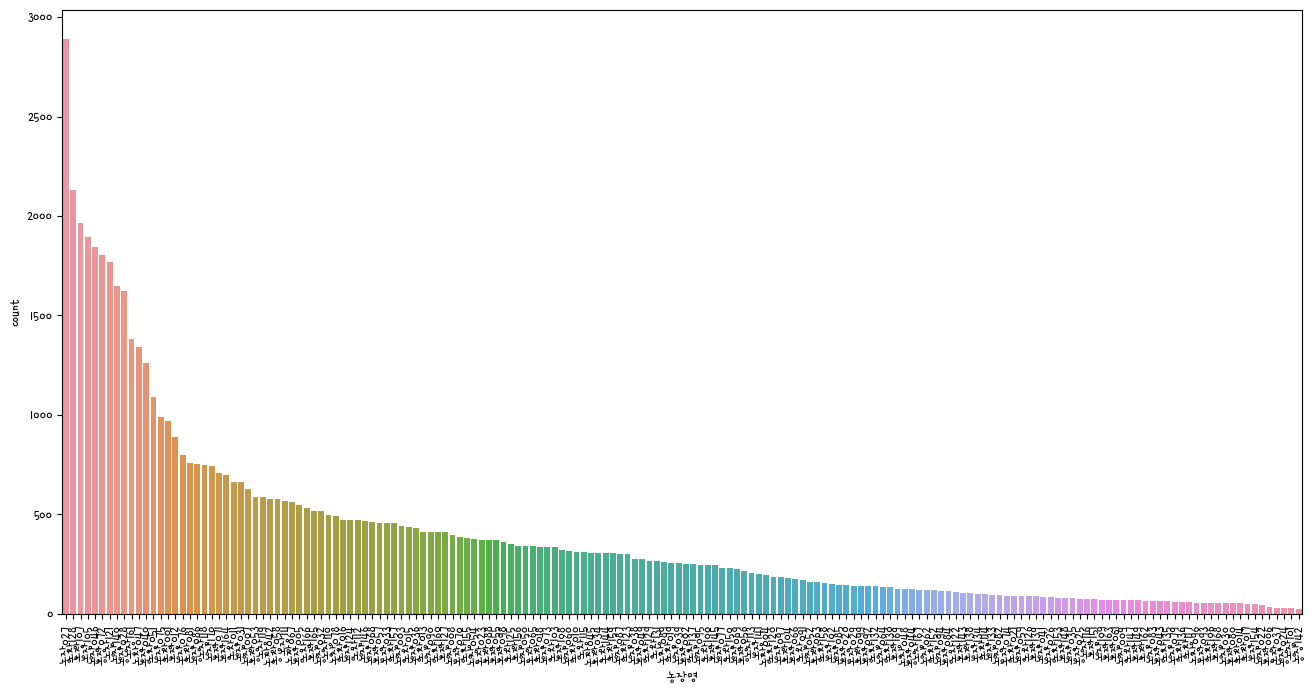

In [41]:
# 농장명 범주별 빈도수로 막대그래프를 그립니다.
plt.figure(figsize = (16, 8), dpi = 100)
sns.countplot(data = df, x = '농장명', order = grp.index)
plt.xticks(rotation = 90);

In [42]:
# 생체중과 도체중의 상관계수를 확인합니다.
df['생체중'].corr(df['도체중'])

0.95128409221553

In [43]:
# 농장명 범주별 생체중 평균을 확인합니다.
grp = pd.pivot_table(data = df, index = '농장명', values = '생체중', aggfunc = np.mean).sort_values(by = ['생체중'])
grp

,생체중
농장명,
농장080,105.870370
농장152,108.228814
농장024,109.100000
농장083,109.200000
농장077,110.806034
...,...
농장149,123.441176
농장167,123.881356
농장143,125.169811


In [44]:
# 이상치 관련 속성을 딕셔너리로 생성합니다.
outlier = dict(
    marker = 'o',
    markersize = 3,
    markerfacecolor = 'pink', 
    markeredgecolor = 'red', 
    markeredgewidth = 0.2
)

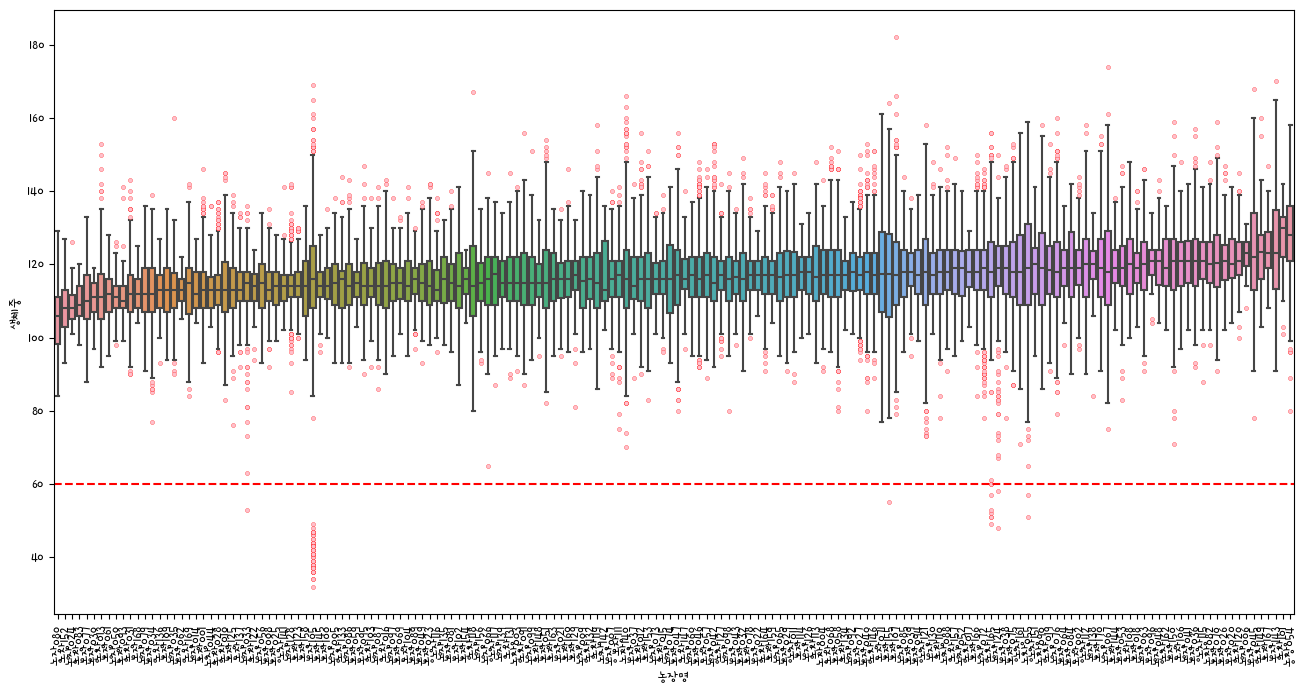

In [45]:
# 농장명 범주별 생체중 분포를 상자 수염 그림으로 그립니다.
plt.figure(figsize = (16, 8), dpi = 100)
sns.boxplot(data = df, x = '농장명', y = '생체중', flierprops = outlier, order = grp.index)
plt.axhline(y = 60, color = 'red', linestyle = '--')
plt.xticks(rotation = 90);

In [46]:
# 상자 수염 그림에서 생체중 60 미만은 이상치로 보입니다.
# 생체중이 60 미만인 행을 갖는 농장명을 확인합니다.
farms = df['농장명'][df['생체중'].lt(60)].unique()
farms

array(['농장055', '농장165', '농장155', '농장105', '농장124', '농장033'], dtype=object)

In [47]:
# 이상치가 많은 농장명의 빈도수를 확인합니다.
df['농장명'][df['농장명'].isin(values = farms)].value_counts()

농장105    1897
농장165     516
농장124     471
농장033     456
농장155     380
농장055     370
Name: 농장명, dtype: int64

In [48]:
# 농장명 범주별 생체중 평균과 표준편차를 피벗 테이블로 생성합니다.
pvt = pd.pivot_table(data = df, values = '생체중', index = '농장명', aggfunc = [np.mean, np.std])
pvt

,mean,std
,생체중,생체중
농장명,,
농장001,113.303093,7.924365
농장002,119.244000,8.474416
농장003,115.766968,8.862133
농장004,117.448980,8.967889
농장005,114.536364,7.614191
...,...,...
농장166,118.456929,9.048805
농장167,123.881356,7.195879


In [49]:
# 데이터프레임을 정렬하려면 열이름을 확인해야 합니다.
pvt.columns

MultiIndex([('mean', '생체중'),
            ( 'std', '생체중')],
           )

In [50]:
# 생체중 표준편차로 내림차순 정렬합니다.
# 이상치가 많은 두 농장명의 표준편차가 가장 큽니다.
pvt.sort_values(by = [( 'std', '생체중')])

,mean,std
,생체중,생체중
농장명,,
농장062,112.822034,4.317785
농장050,111.492669,4.434899
농장154,115.450980,4.846911
농장006,122.457143,5.037173
농장168,112.345455,5.081623
...,...,...
농장071,117.757790,14.976179
농장143,125.169811,15.780320


In [51]:
# 농장명 범주별 도체중 평균을 확인합니다.
grp = pd.pivot_table(data = df, index = '농장명', values = '도체중', aggfunc = np.mean).sort_values(by = ['도체중'])
grp

,도체중
농장명,
농장080,79.851852
농장061,83.402778
농장083,83.430769
농장152,83.635593
농장077,83.754310
...,...
농장167,93.915254
농장143,94.584906
농장026,94.892857


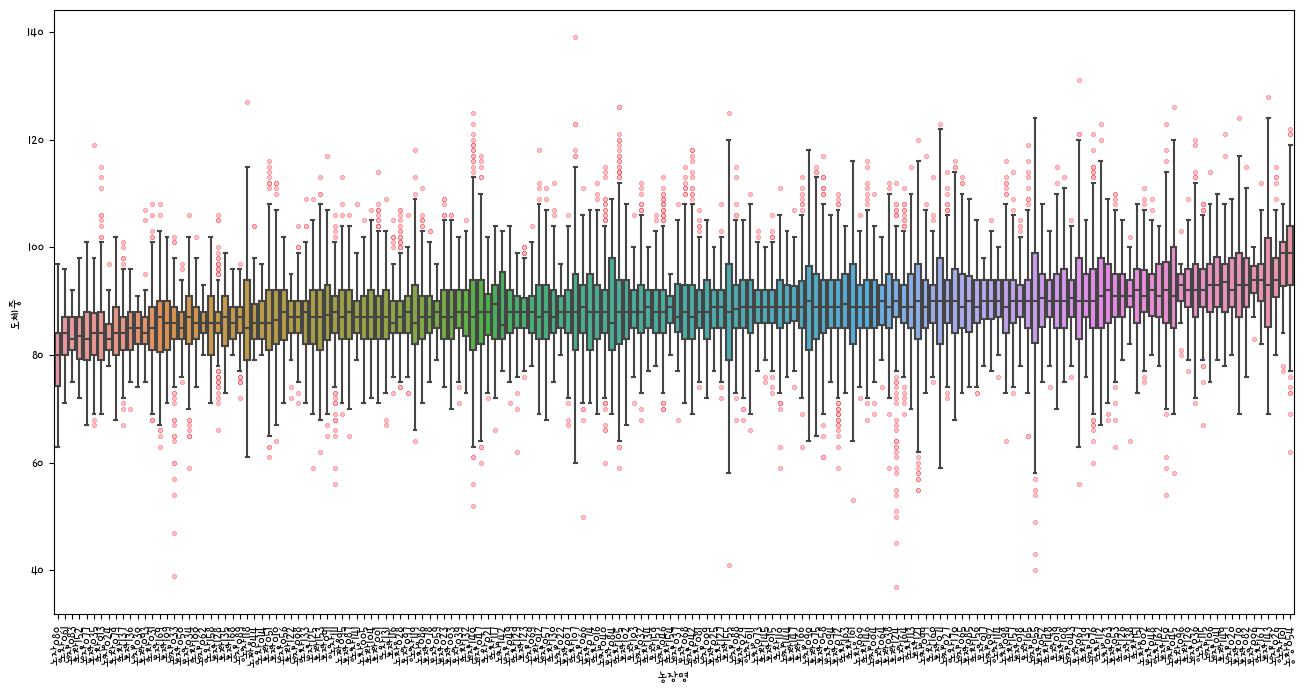

In [52]:
# 농장명 범주별 도체중 분포를 상자 수염 그림으로 그립니다.
plt.figure(figsize = (16, 8), dpi = 100)
sns.boxplot(data = df, x = '농장명', y = '도체중', flierprops = outlier, order = grp.index)
plt.xticks(rotation = 90);

#### 공장명

In [53]:
# 공장명 범주별 빈도수를 확인합니다.
grp = df['공장명'].value_counts()
grp

공장D    36711
공장E    21728
공장C     3257
공장A     2898
공장B     1369
Name: 공장명, dtype: int64

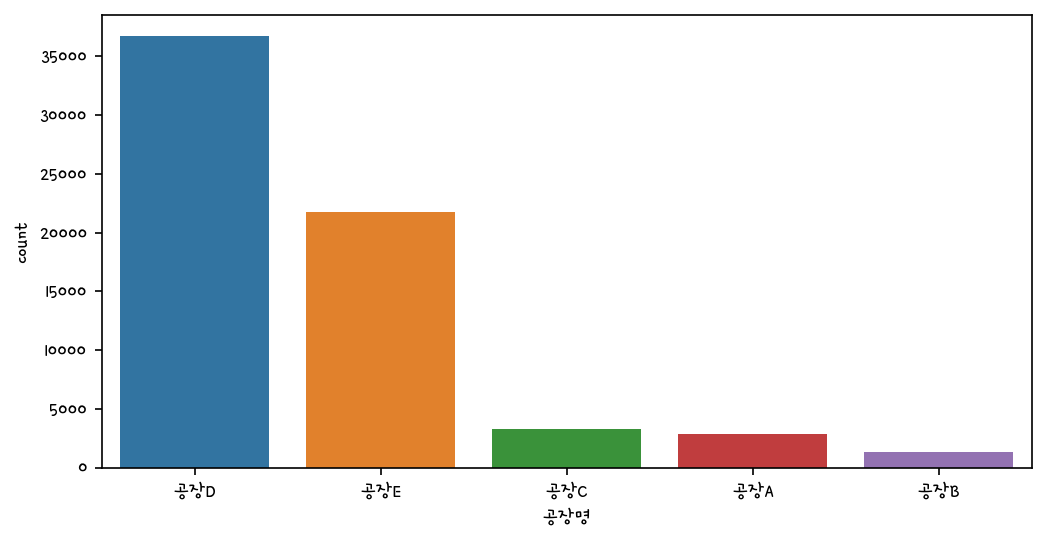

In [54]:
# 공장명 범주별 빈도수로 막대그래프를 그립니다.
sns.countplot(data = df, x = '공장명', order = grp.index);

In [55]:
# 공장명 범주별 생체중 평균을 확인합니다.
grp = pd.pivot_table(data = df, index = '공장명', values = '생체중', aggfunc = np.mean).sort_values(by = ['생체중'])
grp

,생체중
공장명,
공장B,115.173850
공장C,115.342954
공장A,115.591442
공장E,115.881351
공장D,117.492005


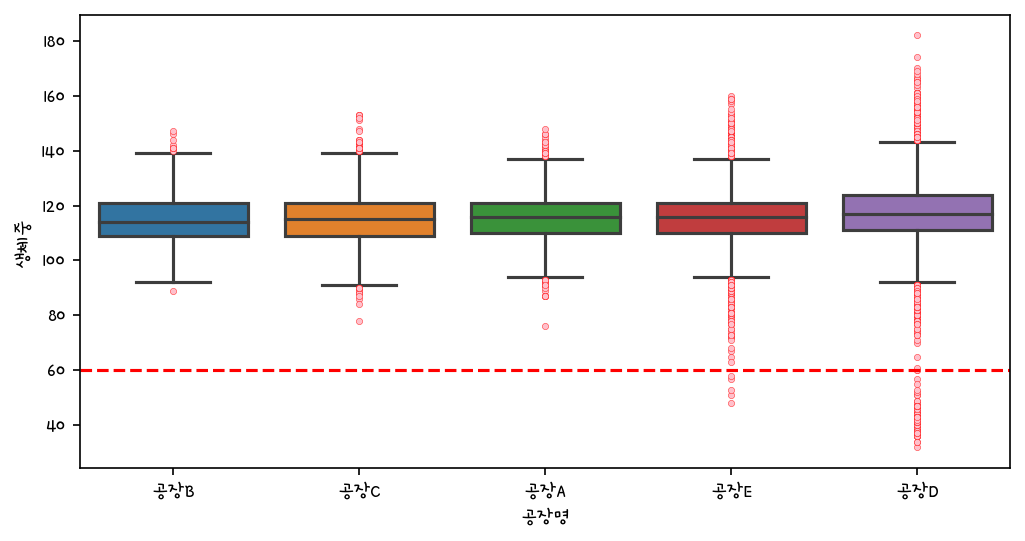

In [56]:
# 공장명 범주별 생체중 분포를 상자 수염 그림으로 그립니다.
sns.boxplot(data = df, x = '공장명', y = '생체중', flierprops = outlier, order = grp.index)
plt.axhline(y = 60, color = 'red', linestyle = '--');

In [57]:
# 공장명 범주별 도체중 평균을 확인합니다.
grp = pd.pivot_table(data = df, index = '공장명', values = '도체중', aggfunc = np.mean).sort_values(by = ['도체중'])
grp

,도체중
공장명,
공장B,87.421476
공장C,87.867670
공장E,88.136000
공장D,89.057939
공장A,89.110076


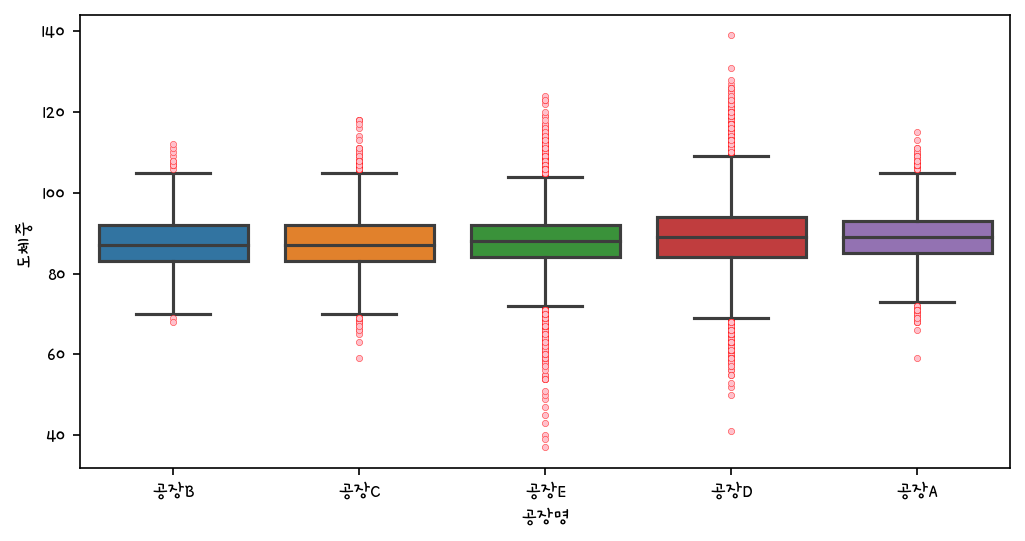

In [58]:
# 공장명 범주별 도체중 분포를 상자 수염 그림으로 그립니다.
sns.boxplot(data = df, x = '공장명', y = '도체중', flierprops = outlier, order = grp.index);

#### 도축년월

In [59]:
# 도축년월 범주별 생체중 평균을 확인합니다.
grp = pd.pivot_table(data = df, index = '도축년월', values = '생체중', aggfunc = np.mean).sort_values(by = ['생체중'])
grp

,생체중
도축년월,
2020년 09월,114.779696
2021년 03월,115.728760
2021년 04월,116.055776
2021년 05월,116.224360
2020년 11월,116.527245
2021년 02월,116.556706
2021년 01월,118.006295
2020년 12월,118.650591
2020년 10월,119.250468


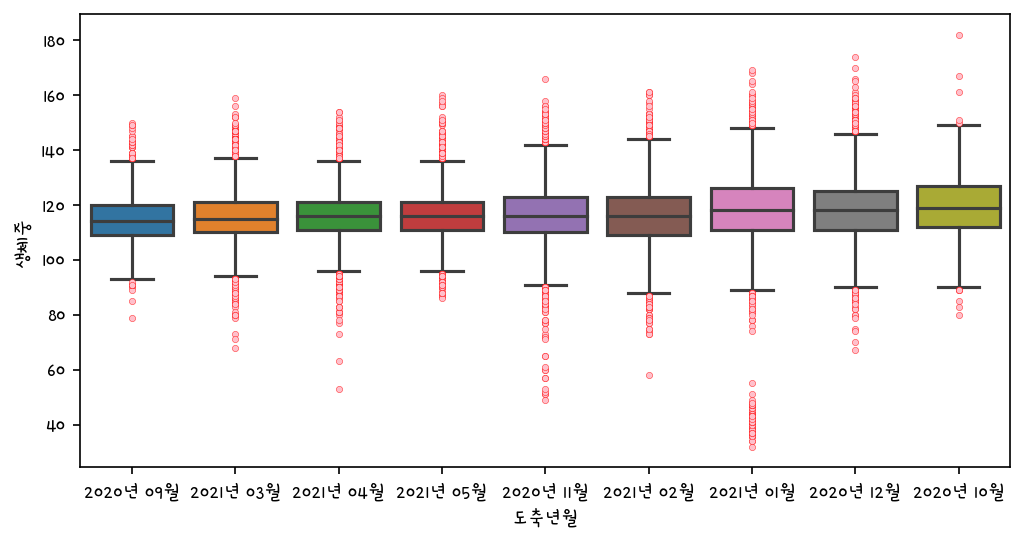

In [60]:
# 도축년월 범주별 생체중 분포를 상자 수염 그림으로 그립니다.
sns.boxplot(data = df, x = '도축년월', y = '생체중', flierprops = outlier, order = grp.index);

In [61]:
# 도축년월 범주별 도체중 평균을 확인합니다.
grp = pd.pivot_table(data = df, index = '도축년월', values = '도체중', aggfunc = np.mean)
grp

,도체중
도축년월,
2020년 09월,87.285714
2020년 10월,90.167395
2020년 11월,88.203715
2020년 12월,89.847760
2021년 01월,90.053003
2021년 02월,88.407351
2021년 03월,87.667988
2021년 04월,88.268517
2021년 05월,88.841724


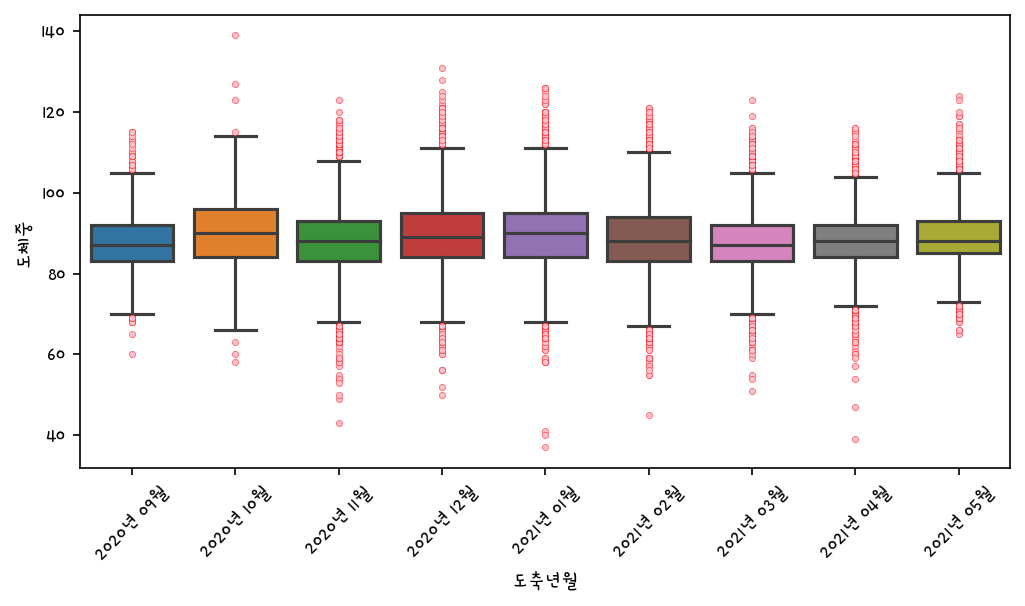

In [62]:
# 도축년월 범주별 도체중 분포를 상자 수염 그림으로 그립니다.
sns.boxplot(data = df, x = '도축년월', y = '도체중', flierprops = outlier, order = grp.index)
plt.xticks(rotation = 45);

#### 지방비율과 제품등급

In [63]:
# 지방비율과 제품등급 범주별 빈도수를 피벗 테이블로 생성합니다.
# 지방비율에 따라 제품등급이 정해지는 것으로 보입니다.
pd.crosstab(index = df['지방비율'], columns = df['제품등급'], margins = True)

제품등급,1,2,3,4,All
지방비율,,,,,
1,1493,0,0,0,1493
2,0,11959,0,0,11959
3,0,28438,0,0,28438
4,0,0,13467,0,13467
5,0,0,5057,0,5057
6,0,0,0,2994,2994
7,0,0,0,2240,2240
8,0,0,0,315,315
All,1493,40397,18524,5549,65963


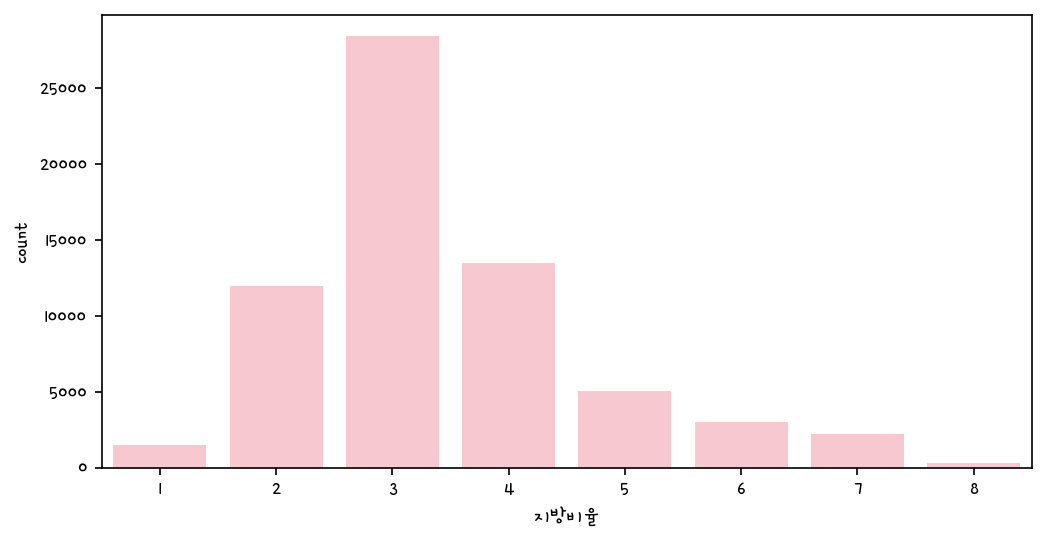

In [64]:
# 지방비율 빈도수로 막대그래프를 그립니다.
sns.countplot(data = df, x = '지방비율', color = 'pink');

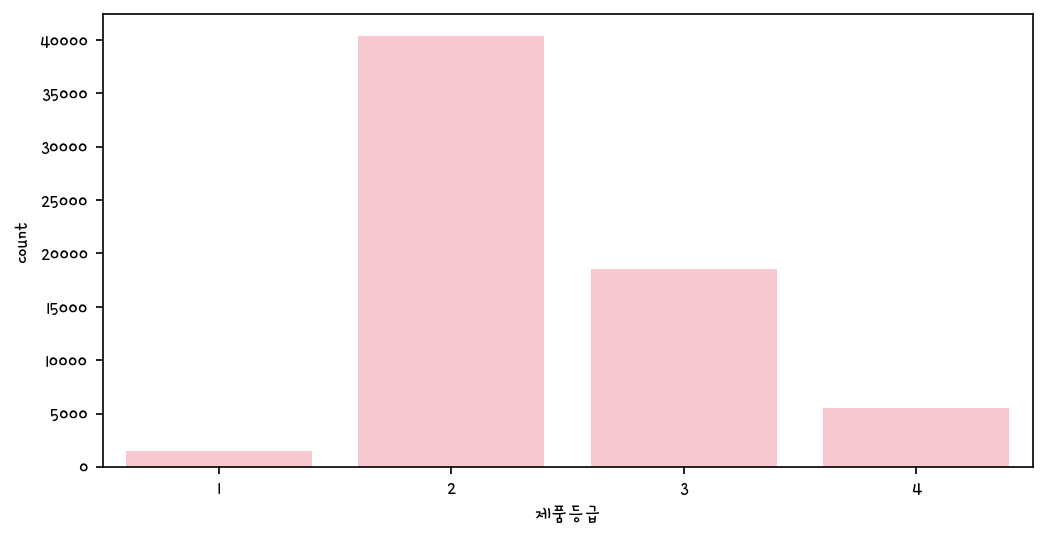

In [65]:
# 제품등급 빈도수로 막대그래프를 그립니다.
sns.countplot(data = df, x = '제품등급', color = 'pink');

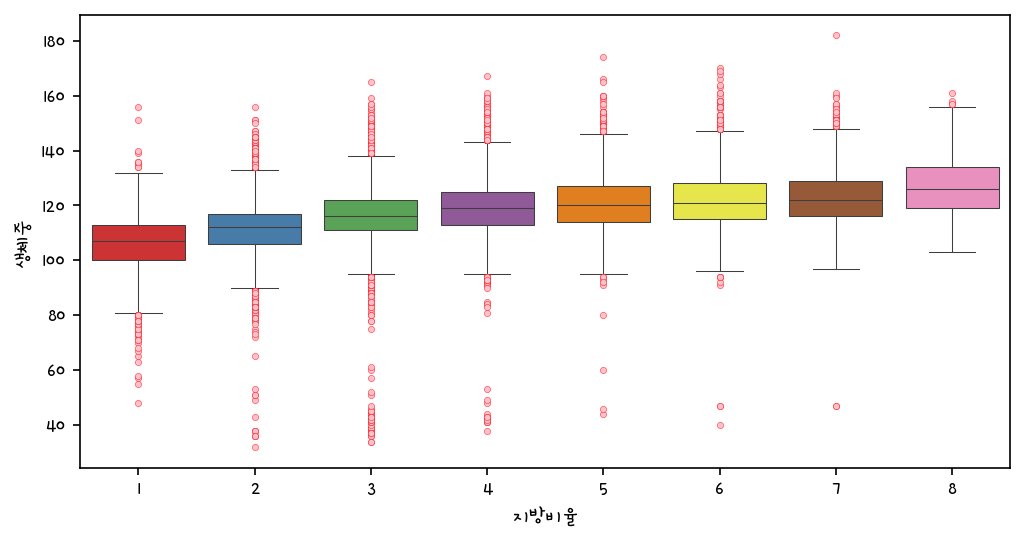

In [66]:
# 지방비율 범주별 생체중 분포를 상자 수염 그림으로 그립니다.
sns.boxplot(data = df, x = '지방비율', y = '생체중', palette = 'Set1', linewidth = 0.5, flierprops = outlier);

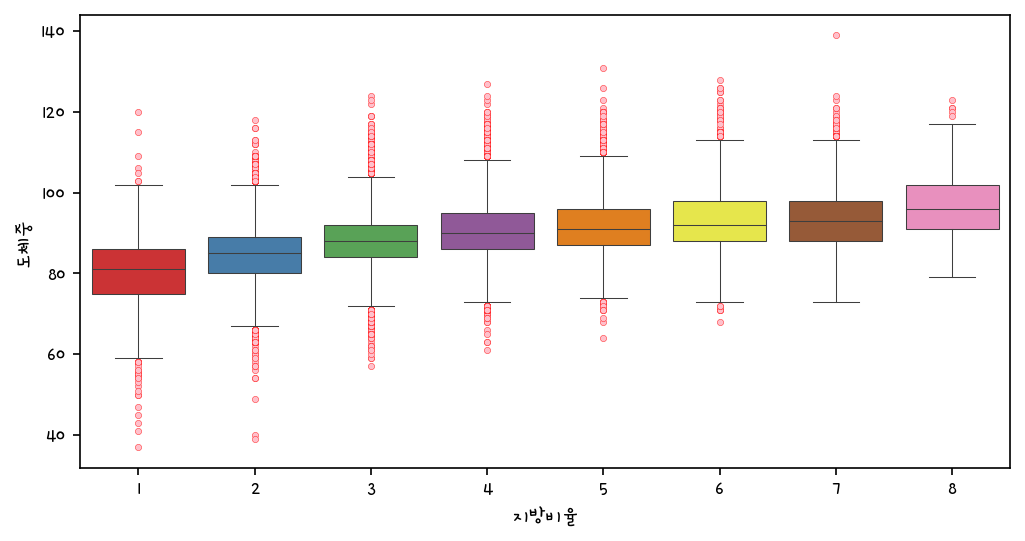

In [67]:
# 지방비율 범주별 도체중 분포를 상자 수염 그림으로 그립니다.
sns.boxplot(data = df, x = '지방비율', y = '도체중', palette = 'Set1', linewidth = 0.5, flierprops = outlier);

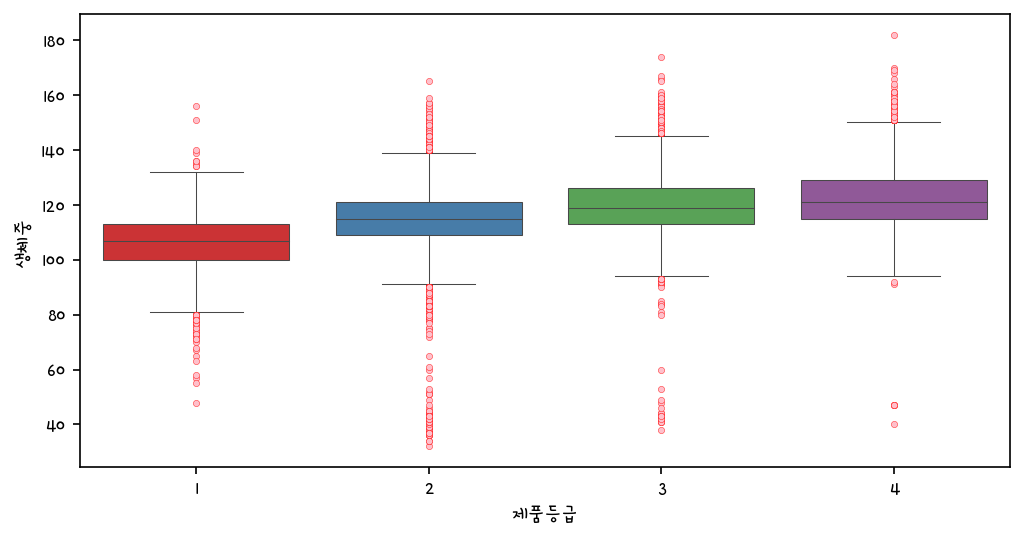

In [68]:
# 제품등급 범주별 생체중 분포를 상자 수염 그림으로 그립니다.
sns.boxplot(data = df, x = '제품등급', y = '생체중', palette = 'Set1', linewidth = 0.5, flierprops = outlier);

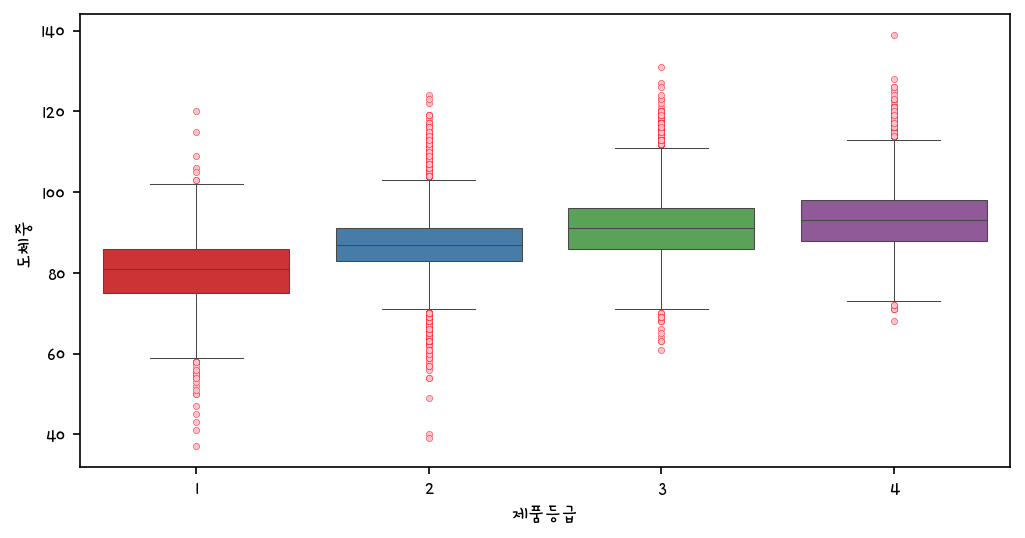

In [69]:
# 제품등급 범주별 도체중 분포를 상자 수염 그림으로 그립니다.
sns.boxplot(data = df, x = '제품등급', y = '도체중', palette = 'Set1', linewidth = 0.5, flierprops = outlier);

#### 성별

In [70]:
# 성별 지방비율 빈도수를 확인합니다.
df.groupby(by = ['지방비율', '성별']).count()['생체중'].reset_index()

,지방비율,성별,생체중
0,1,거세,398
1,1,암,1095
2,2,거세,4311
3,2,암,7648
4,3,거세,14083
5,3,암,14355
6,4,거세,8588
7,4,암,4879
8,5,거세,3468
9,5,암,1589


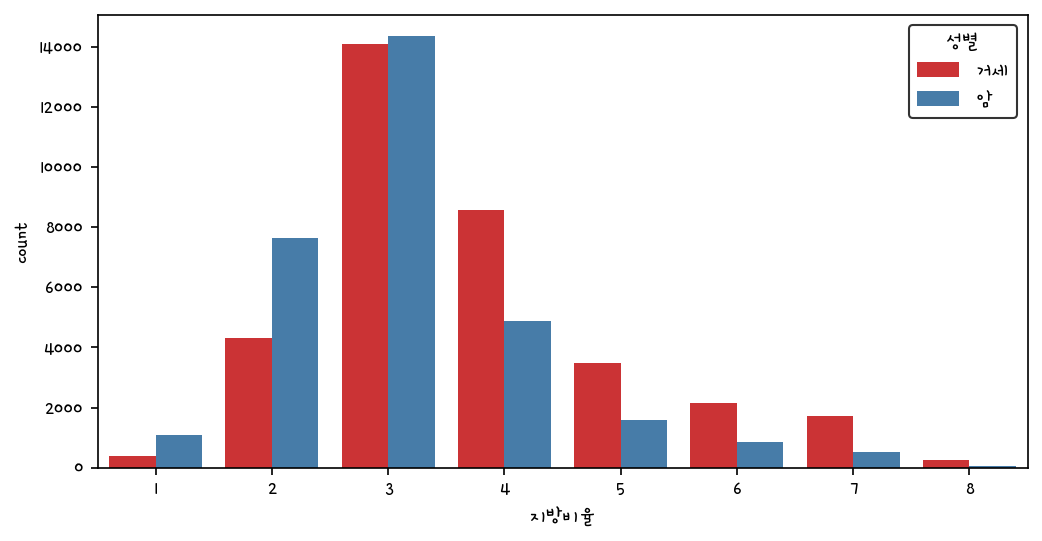

In [71]:
# 성별 지방비율 빈도수로 막대그래프를 그립니다.
# 지방비율이 3을 기준으로 성별에 따라 백분율이 달라지는 것을 알 수 있습니다.
sns.countplot(data = df, x = '지방비율', hue = '성별', palette = 'Set1', hue_order = ['거세', '암']);

In [72]:
# 성별 제품등급 빈도수를 확인합니다.
df.groupby(by = ['제품등급', '성별']).count()['생체중'].reset_index()

,제품등급,성별,생체중
0,1,거세,398
1,1,암,1095
2,2,거세,18394
3,2,암,22003
4,3,거세,12056
5,3,암,6468
6,4,거세,4117
7,4,암,1432


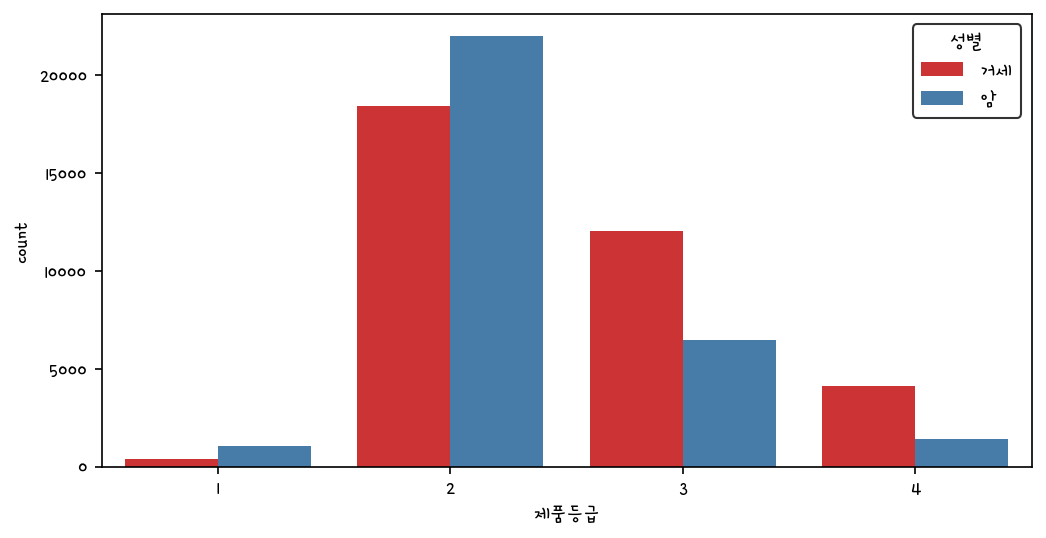

In [73]:
# 성별 제품등급 빈도수로 막대그래프를 그립니다.
sns.countplot(data = df, x = '제품등급', hue = '성별', palette = 'Set1', hue_order = ['거세', '암']);

#### 등지방두께

In [74]:
# 지방비율 범주별 등지방두께 평균을 확인합니다.
df.groupby(by = ['지방비율']).mean()['등지방두께']

지방비율
1    13.855325
2    17.456894
3    20.882270
4    23.822232
5    25.635752
6    27.018036
7    29.636607
8    30.682540
Name: 등지방두께, dtype: float64

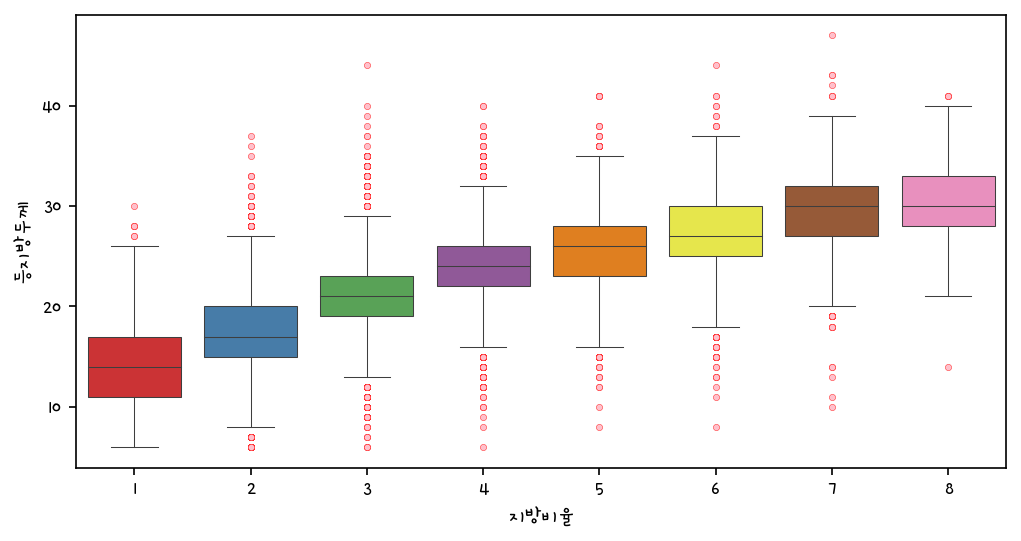

In [75]:
# 지방비율 범주별 등지방두께의 분포를 상자 수염 그림으로 그립니다.
sns.boxplot(data = df, x = '지방비율', y = '등지방두께', palette = 'Set1', linewidth = 0.5, flierprops = outlier);

In [76]:
# 제품등급 범주별 등지방두께 평균을 확인합니다.
df.groupby(by = ['제품등급']).mean()['등지방두께']

제품등급
1    13.855325
2    19.868233
3    24.317318
4    28.283114
Name: 등지방두께, dtype: float64

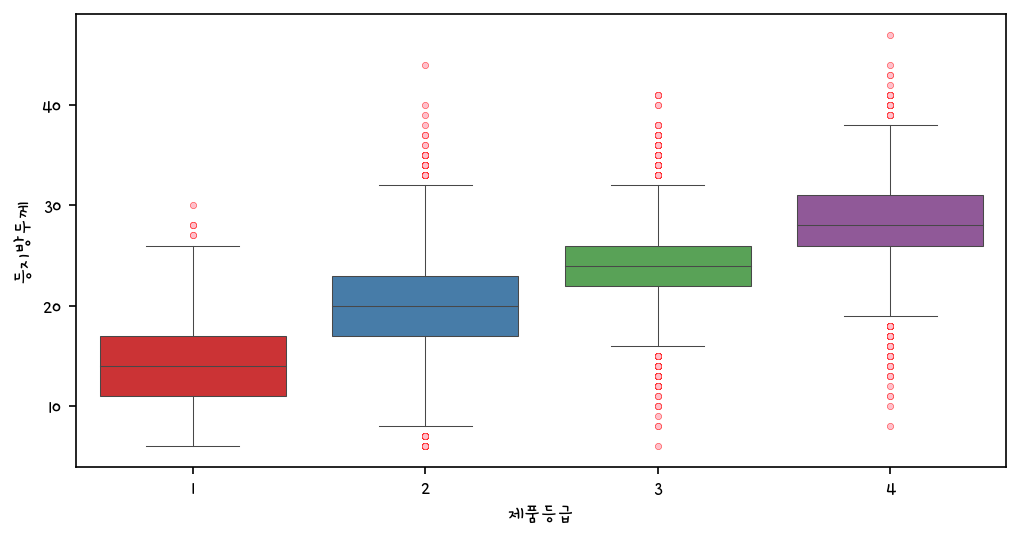

In [77]:
# 제품등급 범주별 등지방두께의 분포를 상자 수염 그림으로 그립니다.
sns.boxplot(data = df, x = '제품등급', y = '등지방두께', palette = 'Set1', linewidth = 0.5, flierprops = outlier);

#### 육질등급

In [78]:
# 지방비율 범주별 육질등급의 상대도수를 확인합니다.
pd.crosstab(index = df['지방비율'], columns = df['육질등급'], normalize = 'index', margins = True)[['1+', '1', '2', '등외']].round(4) * 100

육질등급,1+,1,2,등외
지방비율,,,,
1,11.12,21.30,62.49,5.09
2,27.32,32.30,39.94,0.43
3,41.38,36.04,22.14,0.44
4,31.19,36.94,30.68,1.18
5,17.70,35.14,45.28,1.88
6,12.06,26.79,58.45,2.71
7,5.80,12.99,77.41,3.79
8,1.90,6.03,85.08,6.98
All,31.52,33.80,33.62,1.06


In [79]:
# 육질등급이 '등외'인 행을 삭제합니다.
df = df[df['육질등급'].ne('등외')]

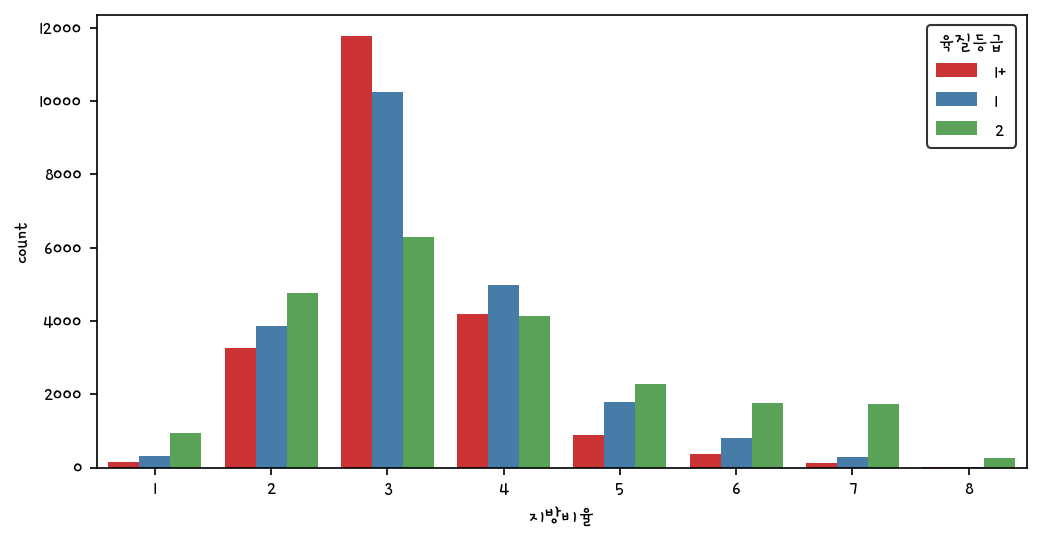

In [80]:
# 지방비율 범주별 육질등급 빈도수로 막대그래프를 그립니다.
sns.countplot(data = df, x = '지방비율', hue = '육질등급', palette = 'Set1', hue_order = ['1+', '1', '2']);

In [81]:
# 제품등급 범주별 육질등급의 상대도수를 확인합니다.
pd.crosstab(index = df['제품등급'], columns = df['육질등급'], normalize = 'index')[['1+', '1', '2']].round(4) * 100

육질등급,1+,1,2
제품등급,,,
1,11.71,22.44,65.84
2,37.38,35.09,27.53
3,27.89,36.96,35.15
4,9.27,20.74,69.99


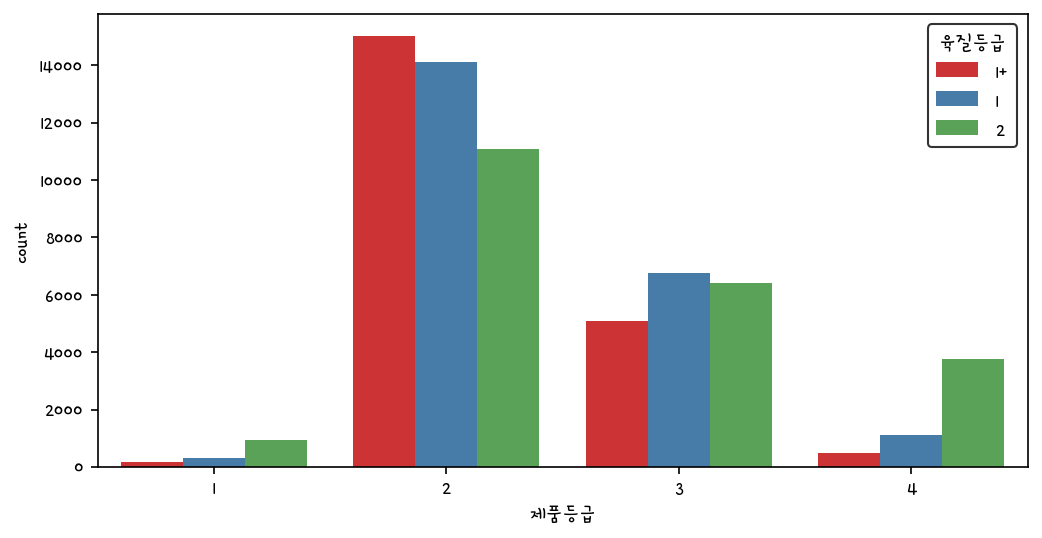

In [82]:
# 제품등급 범주별 육질등급 빈도수로 막대그래프를 그립니다.
sns.countplot(data = df, x = '제품등급', hue = '육질등급', palette = 'Set1', hue_order = ['1+', '1', '2']);

## End of Document